In [25]:
%load_ext autoreload
%autoreload 2

import numpy as np
from sqa_data_gen.data_extraction import *
from os import listdir
import pandas as pd
from tqdm import tqdm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
from keras.utils import to_categorical

from sklearn.metrics import confusion_matrix, f1_score, accuracy_score

In [23]:
# data_folder = 'dataset'
# file_list = [ i for i in listdir(data_folder) if '.dat' in i]

data_path = "source_dataset/opportunity/"
file_list = list(listdir(data_path))

In [19]:
file_list

['S1-ADL4.dat',
 'S1-Drill.dat',
 'S1-ADL5.dat',
 'S1-ADL1.dat',
 'S1-ADL2.dat',
 'S1-ADL3.dat',
 'S2-ADL2.dat',
 'S3-ADL2.dat',
 'S3-ADL3.dat',
 'S2-ADL3.dat',
 'S3-ADL1.dat',
 'S2-ADL1.dat',
 'S3-Drill.dat',
 'S3-ADL4.dat',
 'S2-ADL4.dat',
 'S2-ADL5.dat',
 'S3-ADL5.dat',
 'S4-ADL4.dat',
 'S4-ADL5.dat',
 'S2-Drill.dat',
 'S4-ADL2.dat',
 'S4-ADL3.dat',
 'S4-ADL1.dat',
 'S4-Drill.dat']

In [20]:
# train opp classifier on training dataset

file_list = [
    "S1-ADL1.dat",
    "S1-ADL2.dat",
    "S1-ADL3.dat",
    "S1-ADL4.dat",
    "S1-ADL5.dat",
    "S1-Drill.dat",
    "S2-ADL1.dat",
    "S2-ADL2.dat",
    "S2-ADL3.dat",
    "S2-ADL4.dat",
    "S2-ADL5.dat",
    "S2-Drill.dat",
    "S3-ADL1.dat",
    "S3-ADL2.dat",
    "S3-ADL3.dat",
    "S3-ADL4.dat",
    "S3-ADL5.dat",
    "S3-Drill.dat",
]

In [21]:
# label_list

In [24]:
label1 = np.zeros([0, 1])
label2 = np.zeros([0, 1])
data = np.zeros([0, 77])

for file_i in tqdm(file_list):
    label_y, label_list, data_x = extract_data_from_file(
        file_i, datapath=data_path, plot_option=False, show_other=False
    )
    label1 = np.concatenate((label1, label_y[0].reshape([-1, 1])), axis=0)
    label2 = np.concatenate((label2, label_y[1].reshape([-1, 1])), axis=0)
    data = np.concatenate((data, data_x), axis=0)

reading file 1 of 1
reading file 1 of 1
reading file 1 of 1
reading file 1 of 1
reading file 1 of 1
reading file 1 of 1
reading file 1 of 1
reading file 1 of 1
reading file 1 of 1
reading file 1 of 1
reading file 1 of 1
reading file 1 of 1
reading file 1 of 1
reading file 1 of 1
reading file 1 of 1
reading file 1 of 1
reading file 1 of 1
reading file 1 of 1
reading file 1 of 1
reading file 1 of 1
reading file 1 of 1
reading file 1 of 1
reading file 1 of 1
reading file 1 of 1
reading file 1 of 1
reading file 1 of 1
reading file 1 of 1
reading file 1 of 1
reading file 1 of 1
reading file 1 of 1
reading file 1 of 1
reading file 1 of 1
reading file 1 of 1
reading file 1 of 1
reading file 1 of 1
reading file 1 of 1
reading file 1 of 1
reading file 1 of 1
reading file 1 of 1
reading file 1 of 1
reading file 1 of 1
reading file 1 of 1
reading file 1 of 1
reading file 1 of 1
reading file 1 of 1
reading file 1 of 1
reading file 1 of 1
reading file 1 of 1
reading file 1 of 1
reading file 1 of 1


In [26]:
train_x = data
train_y1 = label1
train_y2 = label2

print(train_x.shape)
print(train_y1.shape)
print(train_y2.shape)

train_y1 = to_categorical(train_y1 - 1, num_classes=len(label_list[0]))
train_y2 = to_categorical(train_y2 - 1, num_classes=len(label_list[1]))
train_x = np.expand_dims(train_x, axis=-1)
train_x = np.expand_dims(train_x, axis=-1)
print("\n")
print(train_x.shape)
print(train_y1.shape)
print(train_y2.shape)

(852573, 77)
(852573, 1)
(852573, 1)


(852573, 77, 1, 1)
(852573, 18)
(852573, 5)


In [27]:
662467 / 30 / 60 / 60  # num of hours for training data

6.133953703703704

# preparing testing data

In [28]:
# train opp classifier on training dataset

test_list = [
    "S4-ADL1.dat",
    "S4-ADL2.dat",
    "S4-ADL3.dat",
    "S4-ADL4.dat",
    "S4-ADL5.dat",
    "S4-Drill.dat",
]

In [30]:
label1 = np.zeros([0, 1])
label2 = np.zeros([0, 1])
data = np.zeros([0, 77])

for file_i in tqdm(test_list):
    label_y, label_list, data_x = extract_data_from_file(
        file_i, datapath=data_path, plot_option=False, show_other=False
    )
    label1 = np.concatenate((label1, label_y[0].reshape([-1, 1])), axis=0)
    label2 = np.concatenate((label2, label_y[1].reshape([-1, 1])), axis=0)
    data = np.concatenate((data, data_x), axis=0)

  0%|          | 0/6 [00:00<?, ?it/s]

reading file 1 of 1
reading file 1 of 1
reading file 1 of 1


 17%|█▋        | 1/6 [00:03<00:18,  3.65s/it]

reading file 1 of 1
reading file 1 of 1
reading file 1 of 1


 33%|███▎      | 2/6 [00:05<00:11,  2.88s/it]

reading file 1 of 1
reading file 1 of 1
reading file 1 of 1


 50%|█████     | 3/6 [00:08<00:07,  2.62s/it]

reading file 1 of 1
reading file 1 of 1
reading file 1 of 1


 67%|██████▋   | 4/6 [00:10<00:04,  2.28s/it]

reading file 1 of 1
reading file 1 of 1
reading file 1 of 1


 83%|████████▎ | 5/6 [00:12<00:02,  2.39s/it]

reading file 1 of 1
reading file 1 of 1
reading file 1 of 1


100%|██████████| 6/6 [00:16<00:00,  2.74s/it]


In [31]:
test_x = data
test_y1 = label1
test_y2 = label2

print(test_x.shape)
print(test_y1.shape)
print(test_y2.shape)

test_y1 = to_categorical(test_y1 - 1, num_classes=len(label_list[0]))
test_y2 = to_categorical(test_y2 - 1, num_classes=len(label_list[1]))
test_x = np.expand_dims(test_x, axis=-1)
test_x = np.expand_dims(test_x, axis=-1)
print("\n")
print(test_x.shape)
print(test_y1.shape)
print(test_y2.shape)

(190106, 77)
(190106, 1)
(190106, 1)


(190106, 77, 1, 1)
(190106, 18)
(190106, 5)


In [32]:
190106 / 30 / 3600

1.7602407407407408

# Definine neural network

In [40]:
import numpy as np

# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, LSTM, Dense, Dropout, Flatten
# from tensorflow.keras.layers import BatchNormalization, Permute, Reshape
from keras.losses import categorical_crossentropy

from keras.models import Sequential
from keras.layers import (
    Dense,
    Activation,
    BatchNormalization,
    Dropout,
    LSTM,
    Flatten,
    Embedding,
    Concatenate,
    concatenate,
    Permute,
    Reshape,
)

# changing merge to concatenate
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D
import h5py

import numpy as np

from keras.layers import Input
from keras.models import Model

import keras

from keras.utils import plot_model
from keras.callbacks import ModelCheckpoint

In [41]:
def model_ConvLSTM(
    dim,
    win_len,
    num_classes_1,
    num_feat_map,
    dropout_rate,
    batchnorm=True,
    dropout=True,
):

    model = Sequential(name="ConvLSTM")

    # default data_format for conv2d: channels_last (batch, rows, cols, channels)
    model.add(
        Convolution2D(
            num_feat_map,
            kernel_size=(1, 3),
            activation="relu",
            input_shape=(dim, win_len, 1),
            padding="same",
            name="Conv_1",
        )
    )

    if batchnorm:
        model.add(BatchNormalization(name="Bn_1"))
    #     model.add(MaxPooling2D(pool_size=(1, 2), name='Max_pool_1'))
    if dropout:
        model.add(Dropout(dropout_rate, name="Drop_1"))
    model.add(
        Convolution2D(
            num_feat_map,
            kernel_size=(1, 3),
            activation="relu",
            padding="same",
            name="Conv_2",
        )
    )
    if batchnorm:
        model.add(BatchNormalization(name="Bn_2"))
    #     model.add(MaxPooling2D(pool_size=(1, 2), name='Max_pool_2'))
    if dropout:
        model.add(Dropout(dropout_rate, name="Drop_2"))

    model.add(Permute((2, 1, 3), name="Permute_1"))  # for swap-dimension
    model.add(Reshape((-1, num_feat_map * dim), name="Reshape_1"))
    model.add(LSTM(32, return_sequences=False, stateful=False, name="Lstm_1"))
    #     model.add(Dense(32, activation='tanh', name='dense_1') )
    if dropout:
        model.add(Dropout(dropout_rate, name="Drop_3"))

    model.add(Dense(num_classes_1, activation="softmax", name="dense_out1"))

    return model

In [42]:
dim = test_x.shape[1]
win_len = 1
num_classes_1 = test_y1.shape[1]
num_classes_2 = test_y2.shape[1]
print(dim, num_classes_1, num_classes_2)

num_feat_map = 64
dropout_rate = 0.3

77 18 5


In [43]:
model_1 = model_ConvLSTM(
    dim,
    win_len,
    num_classes_1,
    num_feat_map,
    dropout_rate,
    batchnorm=True,
    dropout=True,
)

/usr/local/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [44]:
model_1.summary()

Model: "ConvLSTM"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Conv_1 (Conv2D)                 │ (None, 77, 1, 64)      │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Bn_1 (BatchNormalization)       │ (None, 77, 1, 64)      │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Drop_1 (Dropout)                │ (None, 77, 1, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv_2 (Conv2D)                 │ (None, 77, 1, 64)      │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Bn_2 (BatchNormalization)       │ (None, 77, 1, 64)      │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Drop_2 (Dropout)                │ (None, 77, 1, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Permute_1 (Permute)             │ (None, 1, 77, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Reshape_1 (Reshape)             │ (None, 1, 4928)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Lstm_1 (LSTM)                   │ (None, 32)             │       635,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Drop_3 (Dropout)                │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_out1 (Dense)              │ (None, 18)             │           594 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 648,722 (2.47 MB)

 Trainable params: 648,466 (2.47 MB)

 Non-trainable params: 256 (1.00 KB)

In [50]:
print("model training ...")

model_name = "single_1"

############## training ##############
save_path = "opp_model/" + model_name + ".keras"
# es = EarlyStopping(monitor='val_MAE', mode='min', verbose=1, patience=20)
mc = ModelCheckpoint(
    save_path, monitor="val_accuracy", mode="max", verbose=1, save_best_only=True
)

cb_list = [mc]


epochs = 200
batch_size = 300
model_1.compile(loss=categorical_crossentropy, optimizer="adam", metrics=["accuracy"])


print("============ Start Opp Model Training ===========\n")
print("The maximum training epochs is: ", epochs)
H = model_1.fit(
    train_x,
    [train_y1],
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    shuffle=True,
    callbacks=cb_list,
    validation_split=0.2,
)
#                 validation_data=(test_data, test_label))

model training ...
============ Start Opp Model Training ===========

The maximum training epochs is:  200
Epoch 1/200


2024-04-30 15:02:02.539497: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 210073864 exceeds 10% of free system memory.
2024-04-30 15:02:02.845193: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 49108176 exceeds 10% of free system memory.


2274/2274 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7796 - loss: 0.8100

2024-04-30 15:03:14.640754: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 52518620 exceeds 10% of free system memory.



Epoch 1: val_accuracy improved from -inf to 0.77266, saving model to opp_model/single_1.keras
2274/2274 ━━━━━━━━━━━━━━━━━━━━ 76s 33ms/step - accuracy: 0.7796 - loss: 0.8099 - val_accuracy: 0.7727 - val_loss: 0.6663
Epoch 2/200
 560/2274 ━━━━━━━━━━━━━━━━━━━━ 53s 31ms/step - accuracy: 0.8480 - loss: 0.4768

KeyboardInterrupt: 

In [ ]:
# H.history

In [20]:
y_pred1 = model_1.predict(test_x)

In [21]:
y_pred1 = np.argmax(y_pred1, axis=1)
y_true1 = np.argmax(test_y1, axis=1)
cf_matrix = confusion_matrix(y_true1, y_pred1)
print(cf_matrix)
class_wise_f1 = f1_score(y_true1, y_pred1, average=None)
print("the mean-f1 score: {:.4f}".format(np.mean(class_wise_f1)))
accuracy = accuracy_score(y_true1, y_pred1)
print("accuracy is: {:.4f}".format(accuracy))

[[130900     98    151    262    262     95    304    121    373    175
     126    408    117    626    280   2357   2041    157]
 [   664   1727      0    744      0      0      0      0      0      0
       0      0      0      0      0      0     43      0]
 [   616      0   1162     12   1108      0      0      0      0      0
       0      0      0      0      0      0      0      0]
 [   413    250      0   2277      0      0      0      0      0      0
       0      0      0      0      0      1      1      0]
 [   279      6    176     11   2278      0      0      0      0      0
       0      0      0      0      0      0      0      0]
 [  2713      0      0      0      0    397    448    119    260     30
       2      4      0      4      0      0      0      0]
 [  2372      0      0      0      1    189   1099     82    181     33
      21      5     24      0      3      9      0      6]
 [   897      0      2      2      0     31      7    314    477     64
       2   

### 2nd model

In [49]:
# 2nd model
model_2 = model_ConvLSTM(
    dim,
    win_len,
    num_classes_2,
    num_feat_map,
    dropout_rate,
    batchnorm=True,
    dropout=True,
)

model_2.summary()

Model: "ConvLSTM"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Conv_1 (Conv2D)                 │ (None, 77, 1, 64)      │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Bn_1 (BatchNormalization)       │ (None, 77, 1, 64)      │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Drop_1 (Dropout)                │ (None, 77, 1, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv_2 (Conv2D)                 │ (None, 77, 1, 64)      │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Bn_2 (BatchNormalization)       │ (None, 77, 1, 64)      │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Drop_2 (Dropout)                │ (None, 77, 1, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Permute_1 (Permute)             │ (None, 1, 77, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Reshape_1 (Reshape)             │ (None, 1, 4928)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Lstm_1 (LSTM)                   │ (None, 32)             │       635,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Drop_3 (Dropout)                │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_out1 (Dense)              │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 648,293 (2.47 MB)

 Trainable params: 648,037 (2.47 MB)

 Non-trainable params: 256 (1.00 KB)

In [48]:
print("model training ...")

model_name = "single_2"

############## training ##############
save_path = "opp_model/" + model_name + ".keras"
# es = EarlyStopping(monitor='val_MAE', mode='min', verbose=1, patience=20)
mc = ModelCheckpoint(
    save_path, monitor="val_accuracy", mode="max", verbose=1, save_best_only=True
)

cb_list = [mc]


epochs = 200
batch_size = 300
model_2.compile(loss=categorical_crossentropy, optimizer="adam", metrics=["accuracy"])


print("============ Start Opp Model Training ===========\n")
print("The maximum training epochs is: ", epochs)
H = model_2.fit(
    train_x,
    [train_y2],
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    shuffle=True,
    callbacks=cb_list,
    validation_split=0.2,
)
#                 validation_data=(test_data, test_label))

model training ...


NameError: name 'model_2' is not defined

In [46]:
y_pred2 = model_2.predict(test_x)

NameError: name 'model_2' is not defined

In [25]:
y_pred2 = np.argmax(y_pred2, axis=1)
y_true2 = np.argmax(test_y2, axis=1)
cf_matrix = confusion_matrix(y_true2, y_pred2)
print(cf_matrix)
class_wise_f1 = f1_score(y_true2, y_pred2, average=None)
print("the mean-f1 score: {:.4f}".format(np.mean(class_wise_f1)))
accuracy = accuracy_score(y_true2, y_pred2)
print("accuracy is: {:.4f}".format(accuracy))

[[28180  6745  4491  3741    20]
 [ 2116 54448 16548  3248     2]
 [ 1461  3884 35865   297     1]
 [  551   565   313 22311     9]
 [  821     0     1   558  3930]]
the mean-f1 score: 0.7815
accuracy is: 0.7613


# loading saved model

In [26]:
from keras.models import load_model

model_name = "single_1"
save_path = "opp_model/" + model_name + ".hdf5"
trained_model_1 = load_model(save_path)

model_name = "single_2"
save_path = "opp_model/" + model_name + ".hdf5"
trained_model_2 = load_model(save_path)

# evaluate saved model
y_pred1 = trained_model_1.predict(test_x)
y_pred1 = np.argmax(y_pred1, axis=1)
y_true1 = np.argmax(test_y1, axis=1)
cf_matrix = confusion_matrix(y_true1, y_pred1)
print(cf_matrix)
class_wise_f1 = f1_score(y_true1, y_pred1, average=None)
print("the mean-f1 score: {:.4f}".format(np.mean(class_wise_f1)))
accuracy = accuracy_score(y_true1, y_pred1)
print("accuracy is: {:.4f}".format(accuracy))


y_pred2 = trained_model_2.predict(test_x)
y_pred2 = np.argmax(y_pred2, axis=1)
y_true2 = np.argmax(test_y2, axis=1)
cf_matrix = confusion_matrix(y_true2, y_pred2)
print(cf_matrix)
class_wise_f1 = f1_score(y_true2, y_pred2, average=None)
print("the mean-f1 score: {:.4f}".format(np.mean(class_wise_f1)))
accuracy = accuracy_score(y_true2, y_pred2)
print("accuracy is: {:.4f}".format(accuracy))

[[131666     63    133    300    290    134    363     58    136    106
     329    300    122    311    661   1579   2120    182]
 [   740   1674      0    646      0      0      0      0      0      0
       0      0      0      0      0      0    118      0]
 [   612      0   1213      1   1072      0      0      0      0      0
       0      0      0      0      0      0      0      0]
 [   420    212      0   2310      0      0      0      0      0      0
       0      0      0      0      0      0      0      0]
 [   301      5    483     12   1949      0      0      0      0      0
       0      0      0      0      0      0      0      0]
 [  2718      0      0      0      0    390    574     65    171     42
       0     11      2      3      0      1      0      0]
 [  2305      0      0      0      1    149   1189     28    132     33
      94     38     34      1     10      9      0      2]
 [  1255      0      0      1      0     56     12    198    170     25
       2   

In [ ]:
# opportunity data ref:
# https://www.mdpi.com/1424-8220/16/1/115
# https://github.com/vikranth94/Activity-Recognition/blob/master/Activity-Recognition.ipynb

# observe the difference between ground truth label vs pseudo label

In [27]:
label_y, label_list, data_x = extract_data_from_file(
    "S1-ADL4.dat", plot_option=False, show_other=False
)

reading file 1 of 1
reading file 1 of 1
reading file 1 of 1


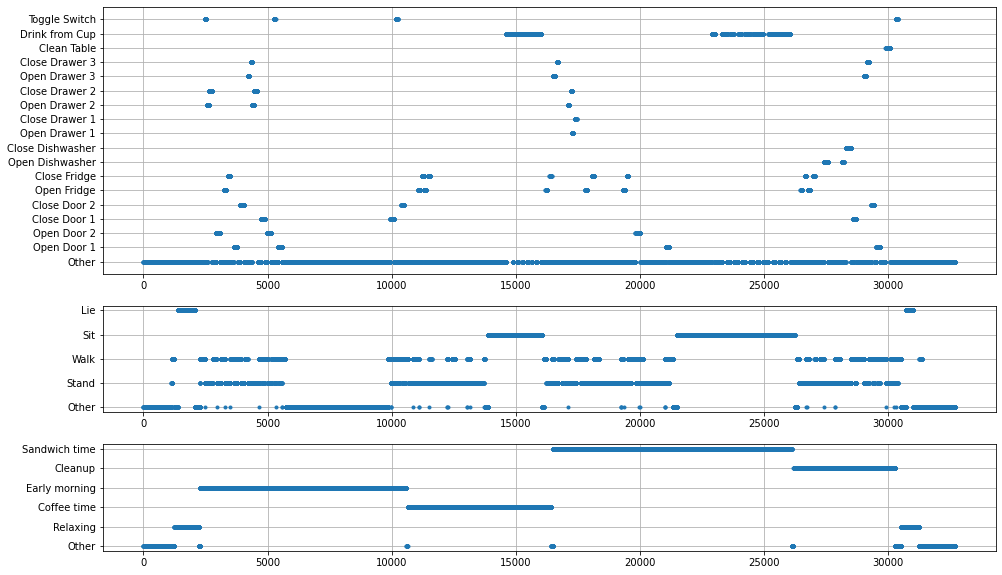

In [28]:
visualize_data_labels(label_y, label_list, show_other=True)

In [29]:
y_pred1 = trained_model_1.predict(test_x)
y_pred2 = trained_model_2.predict(test_x)

y_pred1 = np.argmax(y_pred1, axis=1) + 1
y_pred2 = np.argmax(y_pred2, axis=1) + 1

pseudo_label_y = [y_pred1, y_pred2, label_y[2]]

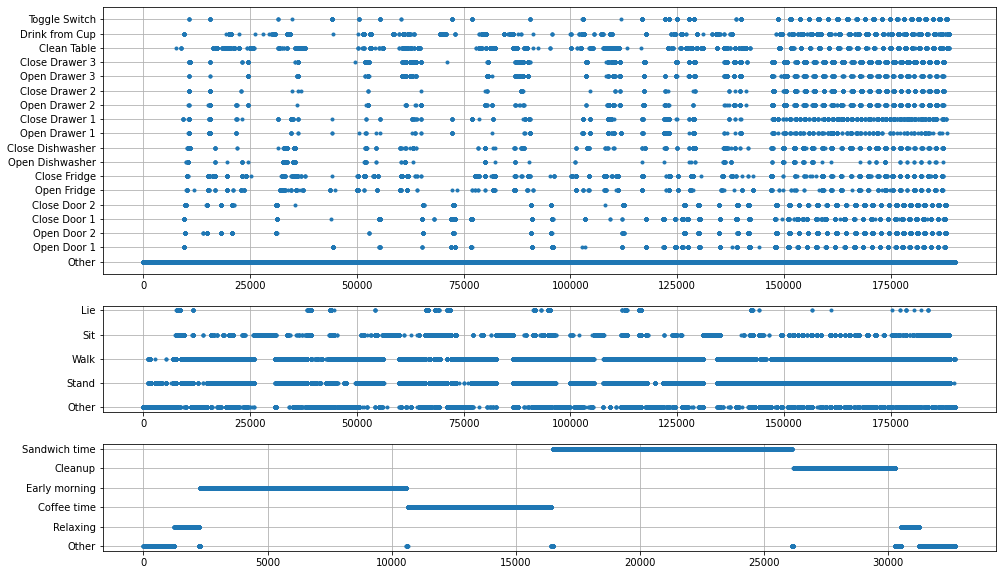

In [30]:
visualize_data_labels(pseudo_label_y, label_list, show_other=True)